In [7]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
%matplotlib notebook

# Exploring the various components of the FFT2 function

In [4]:
from basictools import fft2

In [84]:
reload(fft2)

<module 'basictools.fft2' from '/Users/nielscautaerts/Documents/PythonProjects/TEMMETA/basictools/fft2.py'>

In [9]:
hrtem = Image.open("./examples/1l.tif")

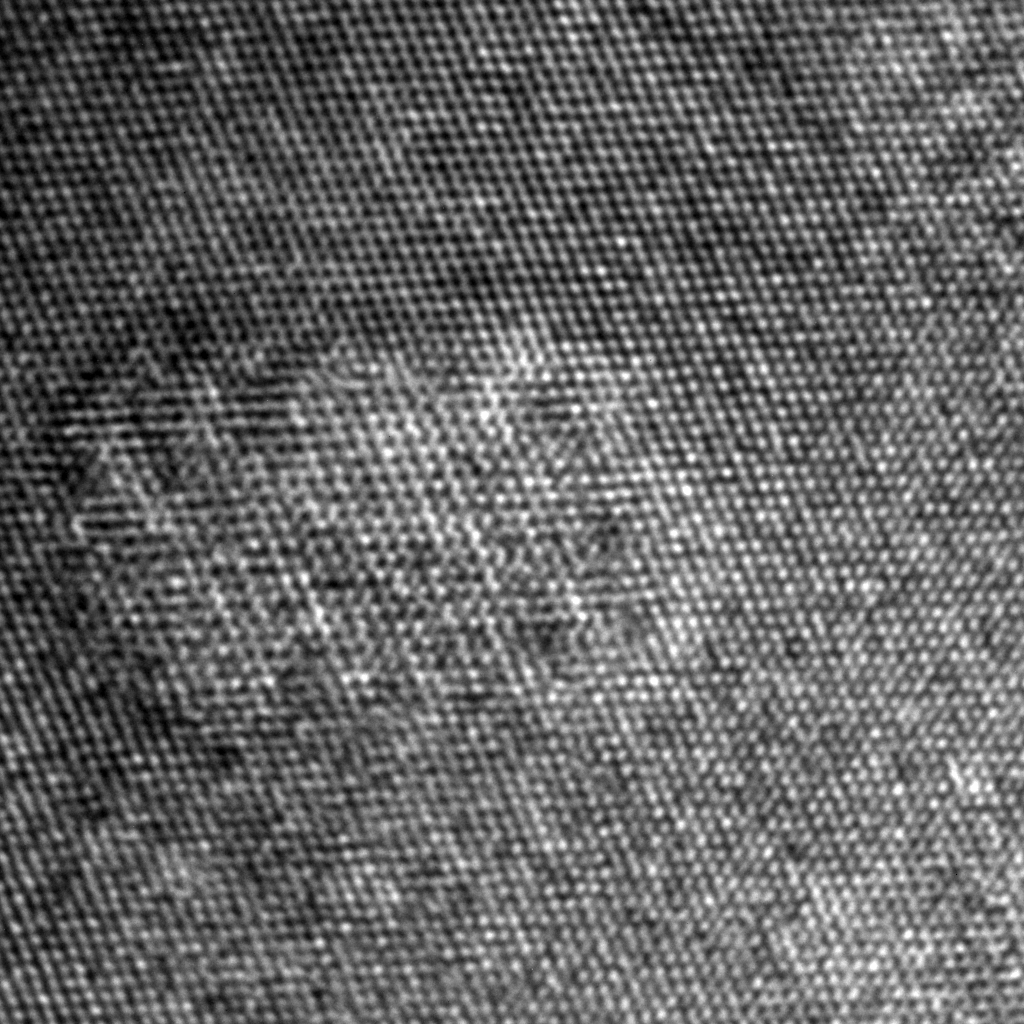

In [13]:
hrtem

In [14]:
hrtemdata = np.array(hrtem)

In [32]:
fft_hrtem = np.fft.fft2(hrtemdata)
fft2_shift = np.fft.fftshift(fft_hrtem)

In [36]:
fft2_db = 20 * np.log10(abs(fft2_shift))

<IPython.core.display.Javascript object>


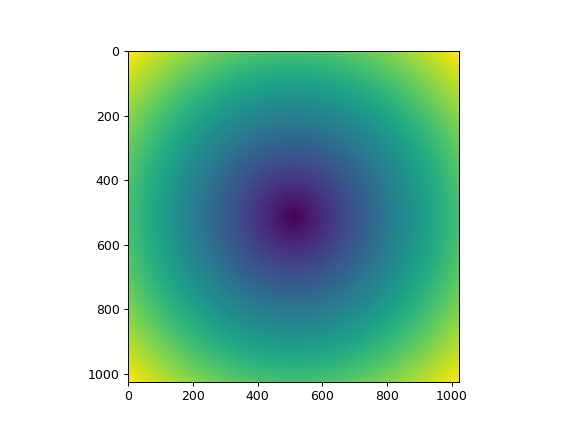

In [47]:
fig, ax = plt.subplots(1)
plt.imshow(fft2_db, cmap = "Greys_r")

In [44]:
fft2_blur = fft2.gausfilter(fft2_db, ks=7, sig=4)

<IPython.core.display.Javascript object>


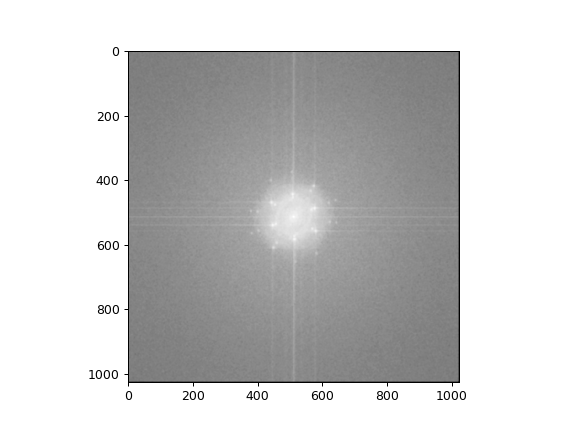

In [46]:
fig, ax = plt.subplots(1)
ax.imshow(fft2_blur, cmap = "Greys_r")

In [57]:
(Nx, Ny) = fft2_db.shape
x = np.arange(-Nx / 2, Nx / 2, 1)
y = np.arange(-Ny / 2, Ny / 2, 1)
xv, yv = np.meshgrid(x, y)
mask_radius = np.sqrt(np.square(xv) + np.square(yv))
mask = mask_radius > 20

#fft2_masked = fft2_blur * mask
#fft2_masked_max = max(fft2_masked)
#fft2_blur = fft2_blur / fft2_masked_max

In [62]:
fft2_masked = fft2_blur * mask

In [68]:
fft2_masked_max = np.max(fft2_masked)

<IPython.core.display.Javascript object>


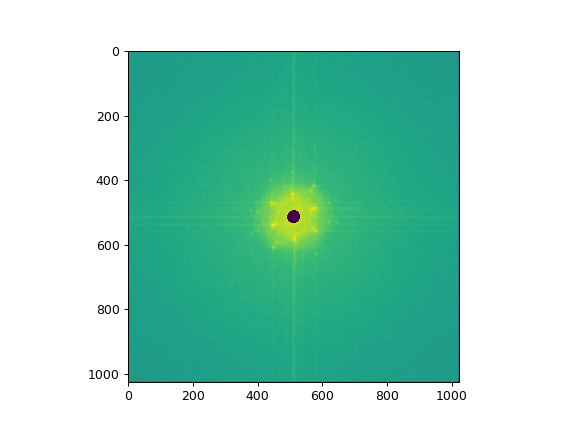

In [64]:
plt.imshow(fft2_masked)

In [69]:
fft2_blur = fft2_blur / fft2_masked_max

In [70]:
fft2_blur[fft2_blur > 1] = 1

<IPython.core.display.Javascript object>


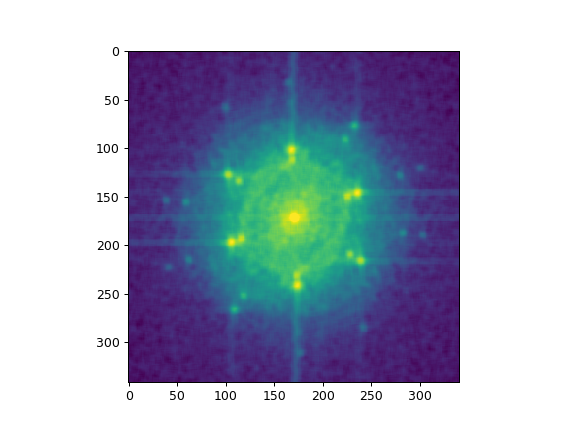

In [71]:
plt.imshow(fft2_blur)

In [73]:
fft2_blur = fft2_blur[Nx//3:Nx*2//3,
                Ny//3:Ny*2//3]

In [85]:
fft_test = fft2.fft2_image(hrtem)

<IPython.core.display.Javascript object>


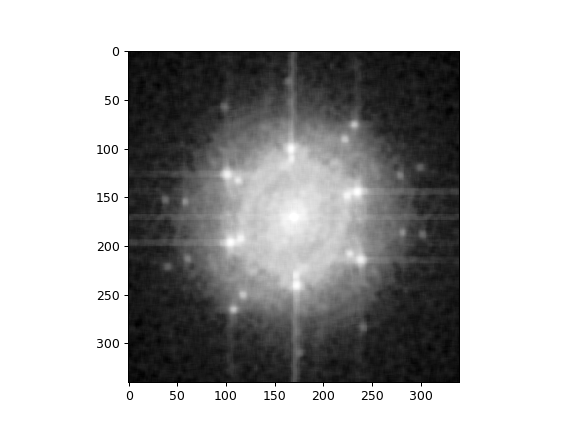

In [87]:
plt.imshow(fft_test, cmap = "Greys_r")